In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
np.set_printoptions(precision=3, suppress=True)

print(pd.__version__)

1.3.4


In [2]:
# Nếu muốn xử lý cả giá trị vô cực (inf) như dữ liệu khuyết
pd.options.mode.use_inf_as_na = True

# 0. Load dữ liệu và kiểm tra sơ bộ thông tin

**Load dữ liệu vào một DataFrame**

In [4]:
fdata = pd.read_csv('nycflights.csv', index_col=0)
fdata.head()

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
1,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0
2,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0
3,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0
4,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576,5.0,44.0
5,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0


In [5]:
# Kiểm tra thông tin của DF: hàm info()
fdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 336776 entries, 1 to 336776
Data columns (total 16 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   year       336776 non-null  int64  
 1   month      336776 non-null  int64  
 2   day        336776 non-null  int64  
 3   dep_time   328521 non-null  float64
 4   dep_delay  328521 non-null  float64
 5   arr_time   328063 non-null  float64
 6   arr_delay  327346 non-null  float64
 7   carrier    336776 non-null  object 
 8   tailnum    334264 non-null  object 
 9   flight     336776 non-null  int64  
 10  origin     336776 non-null  object 
 11  dest       336776 non-null  object 
 12  air_time   327346 non-null  float64
 13  distance   336776 non-null  int64  
 14  hour       328521 non-null  float64
 15  minute     328521 non-null  float64
dtypes: float64(7), int64(5), object(4)
memory usage: 43.7+ MB


In [18]:
# Hiển thị ngẫu nhiên 5 dòng: hàm sample()
fdata.sample(5)

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
233661,2013,6,13,956.0,11.0,1157.0,32.0,AA,N598AA,317,LGA,ORD,116.0,733,9.0,56.0
289930,2013,8,11,1518.0,-2.0,1638.0,2.0,EV,N14974,4580,EWR,MKE,120.0,725,15.0,18.0
164871,2013,3,31,1827.0,28.0,2003.0,13.0,MQ,N9EAMQ,4626,LGA,CMH,77.0,479,18.0,27.0
217794,2013,5,27,1418.0,93.0,1525.0,95.0,AA,N3CVAA,1850,JFK,BOS,41.0,187,14.0,18.0
202234,2013,5,10,1128.0,-2.0,1409.0,-19.0,B6,N517JB,61,JFK,FLL,147.0,1069,11.0,28.0


**Thống kê cơ bản**

In [21]:
# Thống kê cơ bản của các cột
fdata.describe()

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,flight,air_time,distance,hour,minute
count,336776.0,336776.000000,336776.000000,328521.000000,328521.000000,328063.000000,327346.000000,336776.000000,327346.000000,336776.000000,328521.000000,328521.000000
mean,2013.0,6.548510,15.710787,1349.109947,12.639070,1502.054999,6.895377,1971.923620,150.686460,1039.912604,13.173544,31.755501
std,0.0,3.414457,8.768607,488.281791,40.210061,533.264132,44.633292,1632.471938,93.688305,733.233033,4.894426,18.230997
min,2013.0,1.000000,1.000000,1.000000,-43.000000,1.000000,-86.000000,1.000000,20.000000,17.000000,0.000000,0.000000
25%,2013.0,4.000000,8.000000,907.000000,-5.000000,1104.000000,-17.000000,553.000000,82.000000,502.000000,9.000000,16.000000
50%,2013.0,7.000000,16.000000,1401.000000,-2.000000,1535.000000,-5.000000,1496.000000,129.000000,872.000000,14.000000,31.000000
75%,2013.0,10.000000,23.000000,1744.000000,11.000000,1940.000000,14.000000,3465.000000,192.000000,1389.000000,17.000000,49.000000
max,2013.0,12.000000,31.000000,2400.000000,1301.000000,2400.000000,1272.000000,8500.000000,695.000000,4983.000000,24.000000,59.000000


In [20]:
# Chỉ lấy ra các cột dạng số: ['dep_delay', 'arr_delay', 'air_time', 'distance']
fdata[['dep_delay', 'arr_delay', 'air_time', 'distance']].describe()

,dep_delay,arr_delay,air_time,distance
count,328521.000000,327346.000000,327346.000000,336776.000000
mean,12.639070,6.895377,150.686460,1039.912604
std,40.210061,44.633292,93.688305,733.233033
min,-43.000000,-86.000000,20.000000,17.000000
25%,-5.000000,-17.000000,82.000000,502.000000
50%,-2.000000,-5.000000,129.000000,872.000000
75%,11.000000,14.000000,192.000000,1389.000000
max,1301.000000,1272.000000,695.000000,4983.000000


**Thống kê trên một số cột dạng phân loại**

In [22]:
fdata['origin'].unique()

array(['EWR', 'LGA', 'JFK'], dtype=object)

In [23]:
fdata['origin'].value_counts()

EWR    120835
JFK    111279
LGA    104662
Name: origin, dtype: int64

In [24]:
# Thực hiện với cột 'dest'
fdata['dest'].unique()

array(['IAH', 'MIA', 'BQN', 'ATL', 'ORD', 'FLL', 'IAD', 'MCO', 'PBI',
       'TPA', 'LAX', 'SFO', 'DFW', 'BOS', 'LAS', 'MSP', 'DTW', 'RSW',
       'SJU', 'PHX', 'BWI', 'CLT', 'BUF', 'DEN', 'SNA', 'MSY', 'SLC',
       'XNA', 'MKE', 'SEA', 'ROC', 'SYR', 'SRQ', 'RDU', 'CMH', 'JAX',
       'CHS', 'MEM', 'PIT', 'SAN', 'DCA', 'CLE', 'STL', 'MYR', 'JAC',
       'MDW', 'HNL', 'BNA', 'AUS', 'BTV', 'PHL', 'STT', 'EGE', 'AVL',
       'PWM', 'IND', 'SAV', 'CAK', 'HOU', 'LGB', 'DAY', 'ALB', 'BDL',
       'MHT', 'MSN', 'GSO', 'CVG', 'BUR', 'RIC', 'GSP', 'GRR', 'MCI',
       'ORF', 'SAT', 'SDF', 'PDX', 'SJC', 'OMA', 'CRW', 'OAK', 'SMF',
       'TUL', 'TYS', 'OKC', 'PVD', 'DSM', 'PSE', 'BHM', 'CAE', 'HDN',
       'BZN', 'MTJ', 'EYW', 'PSP', 'ACK', 'BGR', 'ABQ', 'ILM', 'MVY',
       'SBN', 'LEX', 'CHO', 'TVC', 'ANC', 'LGA'], dtype=object)

In [25]:
# Thực hiện với cột 'carrier'
fdata['carrier'].unique()

array(['UA', 'AA', 'B6', 'DL', 'EV', 'MQ', 'US', 'WN', 'VX', 'FL', 'AS',
       '9E', 'F9', 'HA', 'YV', 'OO'], dtype=object)

In [26]:
# Đếm với value_counts
fdata['carrier'].value_counts()

UA    58665
B6    54635
EV    54173
DL    48110
AA    32729
MQ    26397
US    20536
9E    18460
WN    12275
VX     5162
FL     3260
AS      714
F9      685
YV      601
HA      342
OO       32
Name: carrier, dtype: int64

In [27]:
# Thực hiện với cột 'tailnum'
fdata['tailnum'].value_counts()

N725MQ    575
N722MQ    513
N723MQ    507
N711MQ    486
N713MQ    483
         ... 
N7ASAA      1
N932DN      1
N318AS      1
N651UA      1
N557AS      1
Name: tailnum, Length: 4043, dtype: int64

# 1. Tìm và loại bỏ dữ liệu khuyết

## 1.1. Kiểm tra dữ liệu NaN

**Hàm df.isna()**

In [ ]:
fdata.isna()

In [ ]:
fdata.isna().sum()

**Tương tự: hàm df.isnull()**

In [28]:
fdata.isnull()

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336772,False,False,False,True,True,True,True,False,True,False,False,False,True,False,True,True
336773,False,False,False,True,True,True,True,False,True,False,False,False,True,False,True,True
336774,False,False,False,True,True,True,True,False,False,False,False,False,True,False,True,True
336775,False,False,False,True,True,True,True,False,False,False,False,False,True,False,True,True


In [30]:
fdata.isnull().sum()

year            0
month           0
day             0
dep_time     8255
dep_delay    8255
arr_time     8713
arr_delay    9430
carrier         0
tailnum      2512
flight          0
origin          0
dest            0
air_time     9430
distance        0
hour         8255
minute       8255
dtype: int64

## 1.2. Kiểm tra dữ liệu không phải là NaN

In [31]:
fdata.notna()

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
1,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
5,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336772,True,True,True,False,False,False,False,True,False,True,True,True,False,True,False,False
336773,True,True,True,False,False,False,False,True,False,True,True,True,False,True,False,False
336774,True,True,True,False,False,False,False,True,True,True,True,True,False,True,False,False
336775,True,True,True,False,False,False,False,True,True,True,True,True,False,True,False,False


## 1.3. Tìm tất cả các dòng có xuất hiện NaN

In [32]:
# Dùng hàm isna() kết hợp any(): bất cứ cột nào có NaN
fdata.isna().any(axis=1)

1         False
2         False
3         False
4         False
5         False
          ...  
336772     True
336773     True
336774     True
336775     True
336776     True
Length: 336776, dtype: bool

In [33]:
# Dùng hàm isna() kết hợp all(): tất cả các cột phải là NaN
fdata.isna().all(axis=1)

1         False
2         False
3         False
4         False
5         False
          ...  
336772    False
336773    False
336774    False
336775    False
336776    False
Length: 336776, dtype: bool

In [34]:
# Tương tự: Dùng hàm isnull()
fdata[fdata.isnull().any(axis=1)]

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
472,2013,1,1,1525.0,-5.0,1934.0,NaN,MQ,N719MQ,4525,LGA,XNA,NaN,1147,15.0,25.0
478,2013,1,1,1528.0,29.0,2002.0,NaN,EV,N17108,3806,EWR,STL,NaN,872,15.0,28.0
616,2013,1,1,1740.0,-5.0,2158.0,NaN,MQ,N739MQ,4413,LGA,XNA,NaN,1147,17.0,40.0
644,2013,1,1,1807.0,29.0,2251.0,NaN,UA,N31412,1228,EWR,SAN,NaN,2425,18.0,7.0
726,2013,1,1,1939.0,59.0,29.0,NaN,9E,N905XJ,3325,JFK,DFW,NaN,1391,19.0,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336772,2013,9,30,NaN,NaN,NaN,NaN,9E,NaN,3393,JFK,DCA,NaN,213,NaN,NaN
336773,2013,9,30,NaN,NaN,NaN,NaN,9E,NaN,3525,LGA,SYR,NaN,198,NaN,NaN
336774,2013,9,30,NaN,NaN,NaN,NaN,MQ,N535MQ,3461,LGA,BNA,NaN,764,NaN,NaN
336775,2013,9,30,NaN,NaN,NaN,NaN,MQ,N511MQ,3572,LGA,CLE,NaN,419,NaN,NaN


## 1.4. Loại bỏ tất cả các dòng có xuất hiện bất cứ NaN

In [40]:
# Loại bỏ tất cả các dòng có NaN: hàm dropna(inplace=True, axis=0, how="any")
# Lưu ý: nếu chọn axis=1 sẽ bỏ các cột có NaN
# fdata.dropna()
fdata.dropna(inplace=True, axis=0, how="any")

In [41]:
# Kiểm tra lại
fdata.isna().any()

year         False
month        False
day          False
dep_time     False
dep_delay    False
arr_time     False
arr_delay    False
carrier      False
tailnum      False
flight       False
origin       False
dest         False
air_time     False
distance     False
hour         False
minute       False
dtype: bool

In [42]:
fdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 327346 entries, 0 to 336769
Data columns (total 16 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   year       327346 non-null  int64  
 1   month      327346 non-null  int64  
 2   day        327346 non-null  int64  
 3   dep_time   327346 non-null  float64
 4   dep_delay  327346 non-null  float64
 5   arr_time   327346 non-null  float64
 6   arr_delay  327346 non-null  float64
 7   carrier    327346 non-null  object 
 8   tailnum    327346 non-null  object 
 9   flight     327346 non-null  int64  
 10  origin     327346 non-null  object 
 11  dest       327346 non-null  object 
 12  air_time   327346 non-null  float64
 13  distance   327346 non-null  int64  
 14  hour       327346 non-null  float64
 15  minute     327346 non-null  float64
dtypes: float64(7), int64(5), object(4)
memory usage: 42.5+ MB


In [43]:
# Kiểm tra lại index: có 327346 giá trị, nhưng lớn nhất lại là 336770
fdata.index

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            336760, 336761, 336762, 336763, 336764, 336765, 336766, 336767,
            336768, 336769],
           dtype='int64', length=327346)

In [44]:
fdata.reset_index(inplace=True, drop=True)
fdata.index

RangeIndex(start=0, stop=327346, step=1)

# 2. Điền vào dữ liệu khuyết

**Chỉ load một số cột**

In [52]:
df = pd.read_csv('nycflights.csv', 
                    index_col=None,
                    usecols=['dep_delay', 'arr_delay', 'distance'])
#fdata.drop(['dep_time','air_time', 'tailnum', 'hour', 'minute'], inplace=True, axis=1)
df.head()

,dep_delay,arr_delay,distance
0,2.0,11.0,1400
1,4.0,20.0,1416
2,2.0,33.0,1089
3,-1.0,-18.0,1576
4,-6.0,-25.0,762


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   dep_delay  328521 non-null  float64
 1   arr_delay  327346 non-null  float64
 2   distance   336776 non-null  int64  
dtypes: float64(2), int64(1)
memory usage: 7.7 MB


## 2.1. Điền vào dữ liệu khuyết với hàm `df.fillna()`

In [47]:
df['dep_delay'].fillna(df['dep_delay'].mean(), inplace=True)

In [50]:
# Thực hiện lại với cột 'arr_delay'
df['arr_delay'].fillna(df['arr_delay'].mean(), inplace=True)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   dep_delay  336776 non-null  float64
 1   arr_delay  336776 non-null  float64
 2   distance   336776 non-null  int64  
dtypes: float64(2), int64(1)
memory usage: 7.7 MB


## 2.2. Sử dụng hàm `interpolate()`

In [54]:
df['dep_delay'].interpolate(method='values', inplace=True)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   dep_delay  336776 non-null  float64
 1   arr_delay  327346 non-null  float64
 2   distance   336776 non-null  int64  
dtypes: float64(2), int64(1)
memory usage: 7.7 MB


## 2.3. Interpolate với dữ liệu thời gian

In [56]:
dates = pd.date_range("20210901", periods=10)
s = pd.Series([18, 12, 15, np.nan, 13, 10, 11, np.nan, 19, 17], index=dates)
s

2021-09-01    18.0
2021-09-02    12.0
2021-09-03    15.0
2021-09-04     NaN
2021-09-05    13.0
2021-09-06    10.0
2021-09-07    11.0
2021-09-08     NaN
2021-09-09    19.0
2021-09-10    17.0
Freq: D, dtype: float64

In [57]:
s.interpolate(method='values')

2021-09-01    18.0
2021-09-02    12.0
2021-09-03    15.0
2021-09-04    14.0
2021-09-05    13.0
2021-09-06    10.0
2021-09-07    11.0
2021-09-08    15.0
2021-09-09    19.0
2021-09-10    17.0
Freq: D, dtype: float64

In [58]:
# Chọn method là values/time
s.interpolate(method='time')

2021-09-01    18.0
2021-09-02    12.0
2021-09-03    15.0
2021-09-04    14.0
2021-09-05    13.0
2021-09-06    10.0
2021-09-07    11.0
2021-09-08    15.0
2021-09-09    19.0
2021-09-10    17.0
Freq: D, dtype: float64

# 3. Tìm và loại bỏ outliers

Trong một phân bố đều hoặc chuẩn, một giá trị thuờng được coi là outlier nếu nó cách xa điểm trung bình ít nhất 3 lần Standard Deviation

In [59]:
np.random.seed(2)
a = np.random.randint(35, 40, size=(20,2))
df1 = pd.DataFrame(data=a, index=range(1,21), columns=list('AB'), dtype='uint8')
df1.iloc[1,0] = 1
df1.iloc[3,1] = 2
df1

,A,B
1,35,35
2,1,37
3,38,35
4,37,2
5,38,37
6,39,39
7,39,38
8,39,37
9,38,38
10,37,36


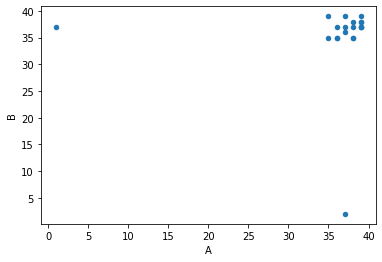

In [60]:
df1.plot.scatter(x='A', y='B')
plt.show()

In [61]:
from scipy import stats
z_scores = stats.zscore(df1)
z_scores

,A,B
1,-0.080668,-0.019425
2,-4.300202,0.239579
3,0.291644,-0.019425
4,0.167540,-4.292994
5,0.291644,0.239579
6,0.415748,0.498583
7,0.415748,0.369081
8,0.415748,0.239579
9,0.291644,0.369081
10,0.167540,0.110077


In [62]:
# Các dòng cần được loại bỏ
df1[(np.abs(z_scores) > 3).any(axis=1)]

,A,B
2,1,37
4,37,2


In [63]:
# Các dòng còn lại
df1[(np.abs(z_scores) < 3).all(axis=1)].reset_index(drop=True)

,A,B
0,35,35
1,38,35
2,38,37
3,39,39
4,39,38
5,39,37
6,38,38
7,37,36
8,37,39
9,38,35


**Thực hiện lại với dữ liệu flights**

(Lưu ý: trên thực tế, cần dựa vào phân bố của dữ liệu)

In [64]:
(stats.zscore(df).abs()>3).value_counts()

dep_delay  arr_delay  distance
False      False      False       327359
True       False      False         8702
False      False      True           706
True       False      True             9
dtype: int64

In [65]:
# Cần thực hiện trên từng cột
df[stats.zscore(df['dep_delay']).abs()<=3]

,dep_delay,arr_delay,distance
0,2.0,11.0,1400
1,4.0,20.0,1416
2,2.0,33.0,1089
3,-1.0,-18.0,1576
4,-6.0,-25.0,762
...,...,...,...
336771,-10.0,NaN,213
336772,-10.0,NaN,198
336773,-10.0,NaN,764
336774,-10.0,NaN,419


In [ ]:
# Tiếp tục với cột 'arr_delay' và 'distance'
df_new = df[stats.zscore(df['dep_delay']).abs()<=3]
df_new = df_new[stats.zscore(df_new['arr_delay']).abs()<=3]f

In [70]:
df_new[stats.zscore(df['distance']).abs()<=3]

C:\Users\QUANG-~1\AppData\Local\Temp/ipykernel_20996/4001904928.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_new[stats.zscore(df['distance']).abs()<=3]


,dep_delay,arr_delay,distance


In [69]:
df_new[stats.zscore(df['distance']).abs()<=3]

C:\Users\QUANG-~1\AppData\Local\Temp/ipykernel_20996/4001031057.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_new[stats.zscore(df['distance']).abs()<=3]


,dep_delay,arr_delay,distance
